Saving Screenshot (118).png to Screenshot (118) (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


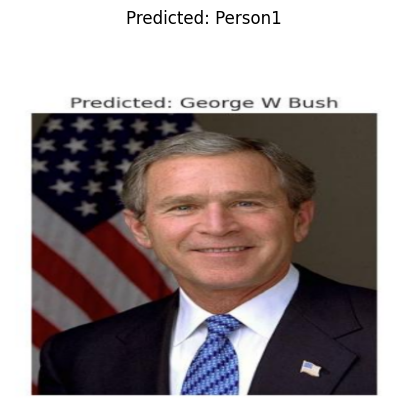

Prediction Probabilities: [[0.5209922  0.47900775]]


In [10]:
# Step 1: Install Necessary Packages
!pip install tensorflow
!pip install scikit-learn

# Step 2: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from google.colab import files

# Step 3: Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax') # Assume 2 classes: Person1, Unknown
])

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: (OPTIONAL) Load Pretrained Weights
# If you already have a trained model, load it
# model.load_weights('face_recognition_cnn_model.h5')

# For now, we will assume the model is untrained.

# Step 6: Upload and Predict Single Image
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn

    # Load the original image for display
    img_original = image.load_img(path)

    # Load resized image for model prediction
    img = image.load_img(path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Class labels
    classes = ['Person1', 'Unknown']

    # Show original image
    plt.imshow(img_original)
    plt.title(f"Predicted: {classes[predicted_class]}")
    plt.axis('off')
    plt.show()

    # Print the prediction probabilities
    print(f"Prediction Probabilities: {prediction}")
